In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import sys
from p5lib import *
import pickle
import os.path

%matplotlib inline

In [2]:
pickle_file = 'reduced_data.pickle'
if os.path.isfile(pickle_file):
    data = pickle.load(open(pickle_file, "rb"))
else:
    data = pd.read_csv('MERGED2013_PP.csv')
    # print data.shape
    data = preprocess_data(data)
    pickle.dump(data, open(pickle_file, "wb"))

print data.shape

(6007, 45)


In [3]:
selected_features = ['CONTROL', 'L4_COLLEGE', 
                     'DEBT_MDN', 'PFTFAC', 'ACTCMMID', 'SAT_AVG_ALL', 'COSTT4_A', 'INEXPFTE', 'PCTPELL', 
                     'PAR_ED_PCT_1STGEN', 'PAR_ED_PCT_PS', 'DEP_INC_AVG', 
                     'C150', 'RET_FT']
selected_cols = ['DEBT_MDN', 'PFTFAC', 'ACTCMMID', 'SAT_AVG_ALL', 'COSTT4_A', 'INEXPFTE', 'PCTPELL', 
          'PAR_ED_PCT_1STGEN', 'PAR_ED_PCT_PS', 'DEP_INC_AVG']
reduced_data = data[selected_features].dropna()

X = reduced_data.copy()
y = X[['C150', 'RET_FT']]
X = X.drop('C150', 1)
X = X.drop('RET_FT', 1)
print X.shape
print y.shape

(1242, 12)
(1242, 2)


--- Median debt ---
count     1242.000000
mean     17542.613527
std       4428.803612
min       3500.000000
25%      14557.500000
50%      17997.500000
75%      20750.000000
max      27000.000000
Name: DEBT_MDN, dtype: float64


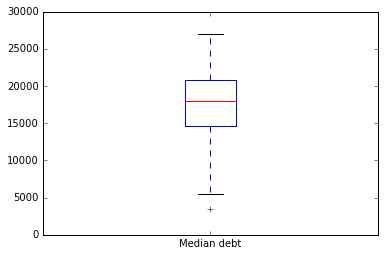

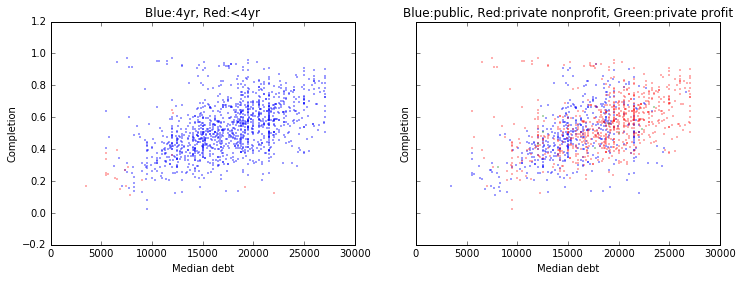

--- Full time faculty rate ---
count    1242.000000
mean        0.711186
std         0.233674
min         0.040300
25%         0.534125
50%         0.723250
75%         0.952250
max         1.000000
Name: PFTFAC, dtype: float64


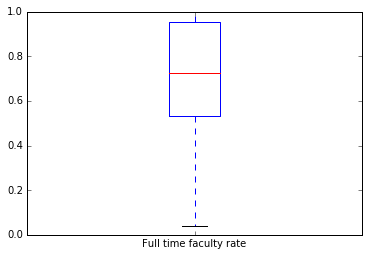

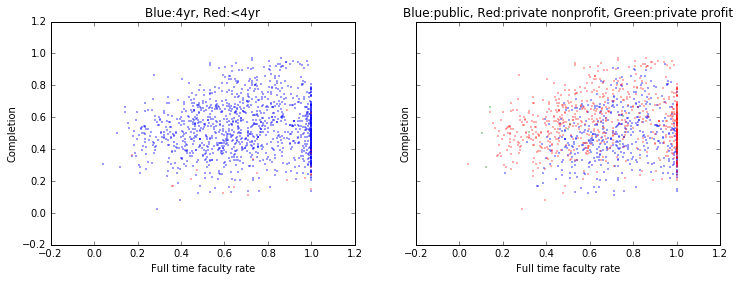

--- ACT ---
count    1242.000000
mean       22.907407
std         3.173007
min        14.000000
25%        21.000000
50%        23.000000
75%        24.000000
max        34.000000
Name: ACTCMMID, dtype: float64


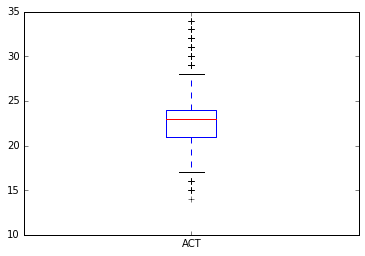

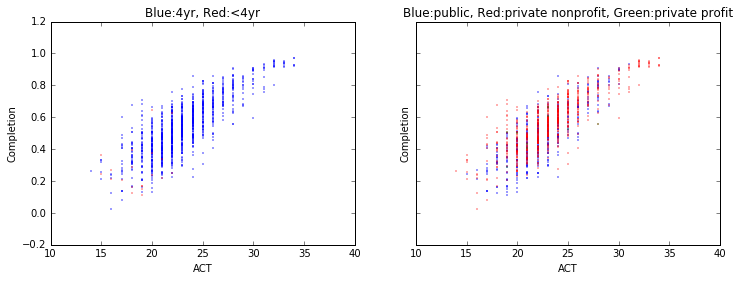

--- SAT all ---
count    1242.000000
mean     1054.645733
std       122.601410
min       666.000000
25%       977.000000
50%      1046.000000
75%      1110.000000
max      1534.000000
Name: SAT_AVG_ALL, dtype: float64


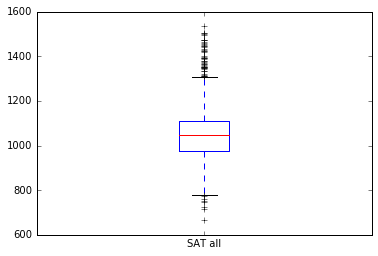

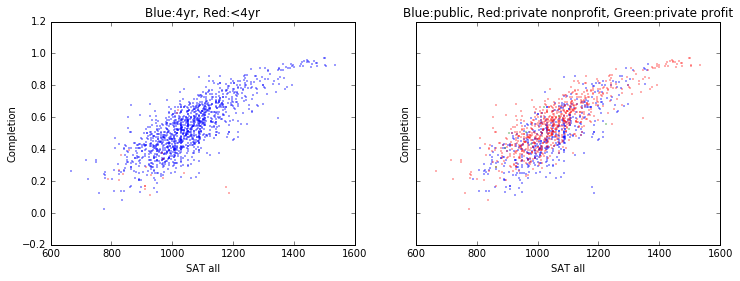

--- Avg cost academic year ---
count     1242.000000
mean     31583.010467
std      12395.793223
min       5285.000000
25%      20590.500000
50%      30936.000000
75%      40581.000000
max      62594.000000
Name: COSTT4_A, dtype: float64


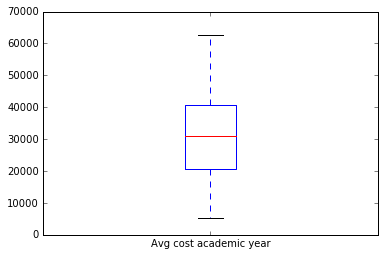

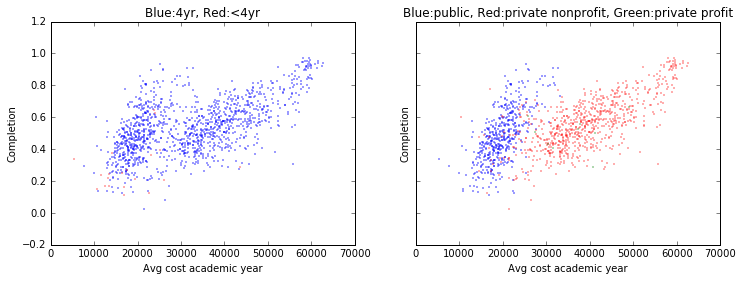

--- Expense per FTE student ---
count      1242.000000
mean       9701.162641
std        8111.585326
min        1889.000000
25%        6339.000000
50%        8050.500000
75%       10435.750000
max      106214.000000
Name: INEXPFTE, dtype: float64


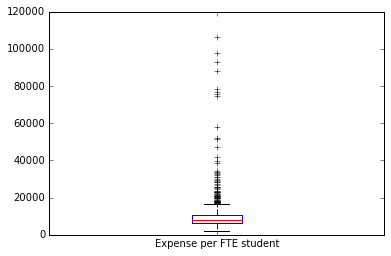

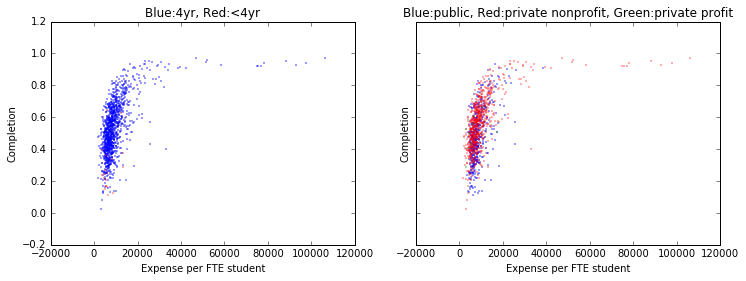

--- % Pell Grant receiver ---
count    1242.000000
mean        0.372049
std         0.138500
min         0.061600
25%         0.271300
50%         0.359600
75%         0.452075
max         0.945100
Name: PCTPELL, dtype: float64


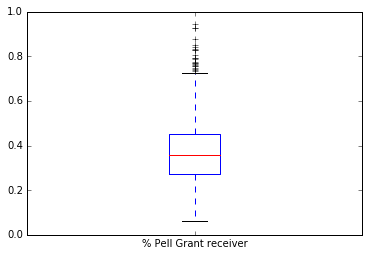

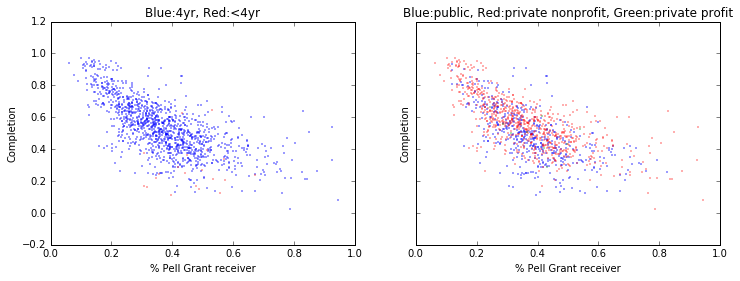

--- % 1st gen students ---
count    1242.000000
mean        0.335863
std         0.098093
min         0.058824
25%         0.264435
50%         0.343735
75%         0.404566
max         0.643030
Name: PAR_ED_PCT_1STGEN, dtype: float64


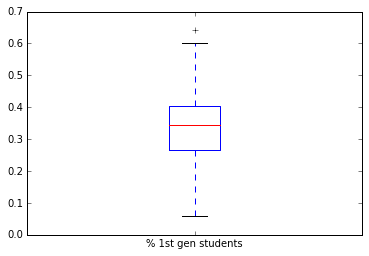

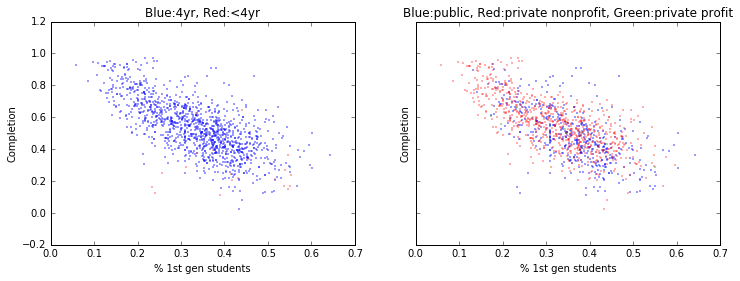

--- % parent education post secondary ---
count    1242.000000
mean        0.664137
std         0.098093
min         0.356970
25%         0.595434
50%         0.656265
75%         0.735565
max         0.941176
Name: PAR_ED_PCT_PS, dtype: float64


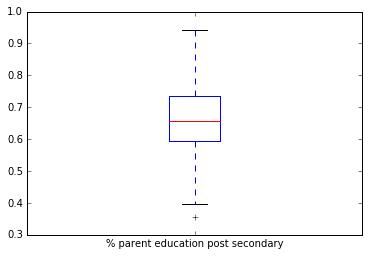

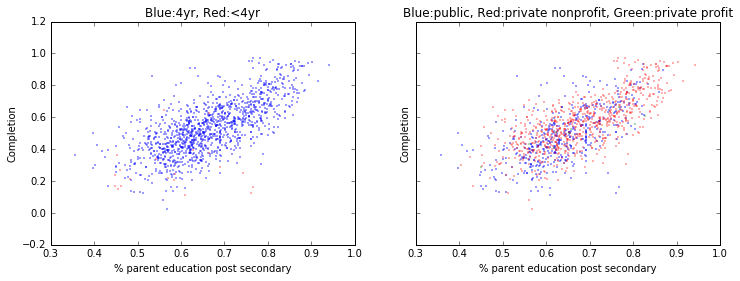

--- Avg income dependent stu ---
count      1242.000000
mean      73489.099614
std       20220.603973
min       20824.698730
25%       59711.244230
50%       71991.250770
75%       86555.409255
max      152596.083700
Name: DEP_INC_AVG, dtype: float64


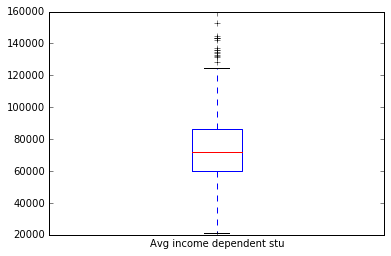

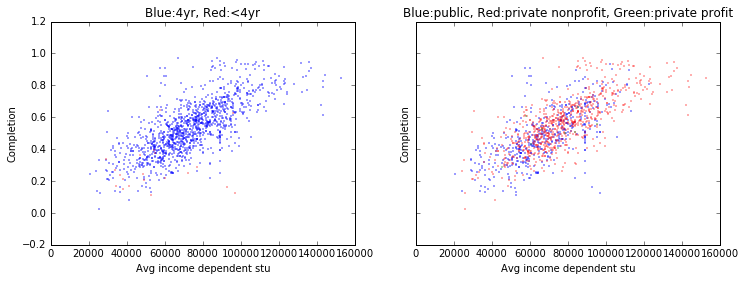

In [4]:
reduced_data['L4_COLLEGE'] = reduced_data['L4_COLLEGE'].astype(int)

data_for_plotting = {
    'data': reduced_data,
    'data_L4': reduced_data[reduced_data['L4_COLLEGE'] == 1],
    'data_4': reduced_data[reduced_data['L4_COLLEGE'] == 0],
    'data_control1': reduced_data[reduced_data.CONTROL == 1], # public
    'data_control2': reduced_data[reduced_data.CONTROL == 2], # private non-profit
    'data_control3': reduced_data[reduced_data.CONTROL == 3]  # private profit
}
plot_feature_vs_completion(selected_cols, data_for_plotting)

In [5]:
from sklearn import preprocessing
tmpX = X[selected_cols]

scaler = preprocessing.StandardScaler()
scaledX = scaler.fit_transform(tmpX)
print scaledX.shape

(1242, 10)


In [6]:
# add the categorical feature

tmp1X = np.array(pd.get_dummies(X['CONTROL']))
tmp2X = X['L4_COLLEGE'].astype(int)
tmp2X = np.reshape(tmp2X, (len(tmp2X), 1)) 
print tmp1X.shape
print tmp2X.shape
print scaledX.shape
finalX = np.concatenate((scaledX, tmp1X, tmp2X), axis=1)
print finalX.shape

(1242, 3)
(1242, 1)
(1242, 10)
(1242, 14)


In [7]:
from sklearn import metrics
from sklearn import cross_validation as cv
from sklearn.tree import DecisionTreeRegressor

y = np.array(y)
X_train, X_test, y_train, y_test = cv.train_test_split(finalX, y, train_size=0.8)
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(993, 14)
(249, 14)
(993, 2)
(249, 2)


--- R2 Completion ---
best params: {'epsilon': 0.10000000000000001, 'C': 0.10000000000000001, 'gamma': 0.10000000000000001}
R2 score on train data: 0.792603221142
R2 score on test  data: 0.747878311417
--- R2 Retention ---
best params: {'epsilon': 0.10000000000000001, 'C': 0.10000000000000001, 'gamma': 0.10000000000000001}
R2 score on train data: 0.625868405235
R2 score on test  data: 0.556057912229
--- MSE Completion ---
MSE on train data: 0.00584535299109
MSE on test  data: 0.00677311470564
--- MSE Retention ---
MSE on train data: 0.00481447804132
MSE on test  data: 0.00634869930353
--- MAE Completion ---
MAE on train data: 0.0602848688229
MAE on test  data: 0.0620739736123
--- MAE Retention ---
MAE on train data: 0.0524874577294
MAE on test  data: 0.060959134405


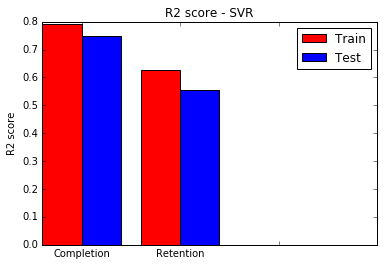

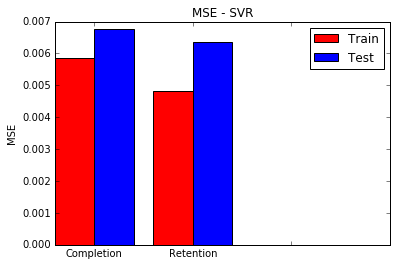

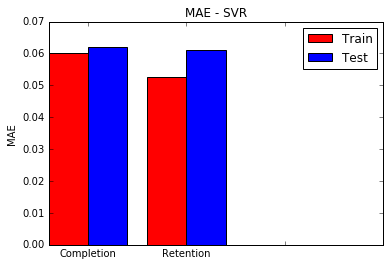

In [8]:
SVR_model = build_SVR_model(X_train, X_test, y_train, y_test, cv=3)

--- R2 Completion ---
best params: {'n_neighbors': 10}
R2 score on train data: 0.803129198742
R2 score on test  data: 0.773671931259
--- R2 Retention ---
best params: {'n_neighbors': 10}
R2 score on train data: 0.682153343987
R2 score on test  data: 0.623182493025
--- MSE Completion ---
MSE on train data: 0.00554868466775
MSE on test  data: 0.00608018286449
--- MSE Retention ---
MSE on train data: 0.00409018048006
MSE on test  data: 0.00538876828755
--- MAE Completion ---
MAE on train data: 0.0572834382738
MAE on test  data: 0.0607311802659
--- MAE Retention ---
MAE on train data: 0.044846918429
MAE on test  data: 0.0541418473896


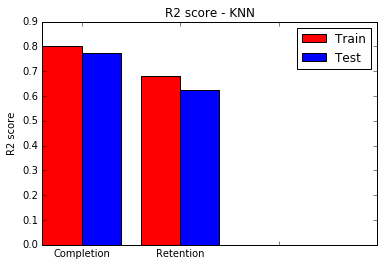

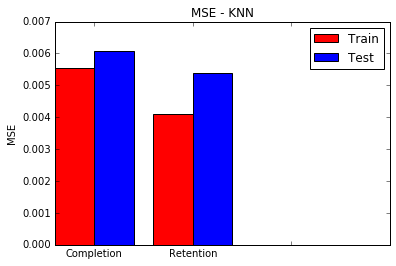

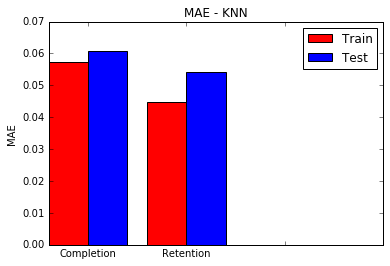

In [9]:
KNN_model = build_KNN_model(X_train, X_test, y_train, y_test)

In [10]:
X_all = data[selected_features].copy()

for col in selected_cols:
    if col in X:
        X_all[col] = X_all[col].fillna(X_all[col].mean())

print X_all.shape
print len(X_all.dropna()) # check there is no missing values

(6007, 14)
6007


In [11]:
y1_all = X_all.C150
y2_all = X_all.RET_FT
y_all = X_all[['C150', 'RET_FT']].as_matrix()
print y_all.shape
X_all = X_all.drop('C150', 1)
X_all = X_all.drop('RET_FT', 1)

print X_all.shape
print y1_all.shape
print y2_all.shape

(6007, 2)
(6007, 12)
(6007,)
(6007,)


In [12]:
tmpX = X_all[selected_cols]

# use scaler that was used to train the model
scaledX = scaler.transform(tmpX)

In [13]:

tmp1X = np.array(pd.get_dummies(X_all['CONTROL']))
tmp2X = X_all['L4_COLLEGE'].astype(int)
tmp2X = np.reshape(tmp2X, (len(tmp2X), 1)) 
print tmp1X.shape
print tmp2X.shape
print scaledX.shape
finalX = np.concatenate((scaledX, tmp1X, tmp2X), axis=1)
print finalX.shape

print "--- Completion ---"
print_r2score(SVR_model['reg1'], finalX, y1_all, test=True)
print_mse(SVR_model['reg1'], finalX, y1_all, test=True)
print_mae(SVR_model['reg1'], finalX, y1_all, test=True)

print "--- Retention ---"
print_r2score(SVR_model['reg2'], finalX, y2_all, test=True)
print_mse(SVR_model['reg2'], finalX, y2_all, test=True)
print_mae(SVR_model['reg2'], finalX, y2_all, test=True)

(6007, 3)
(6007, 1)
(6007, 10)
(6007, 14)
--- Completion ---
R2 score on test  data: 0.14754637993
MSE on test  data: 0.0480950015429
MAE on test  data: 0.179380070892
--- Retention ---
R2 score on test  data: -0.0040689190072
MSE on test  data: 0.0320447365057
MAE on test  data: 0.132334673143


0.13233467314254541

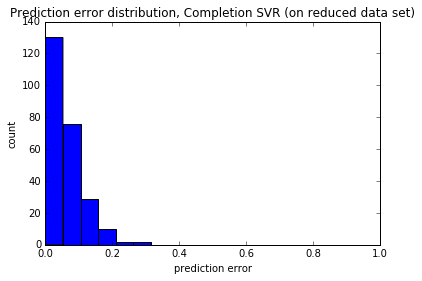

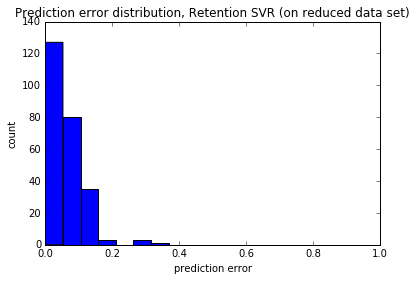

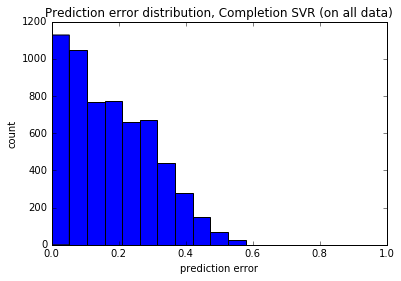

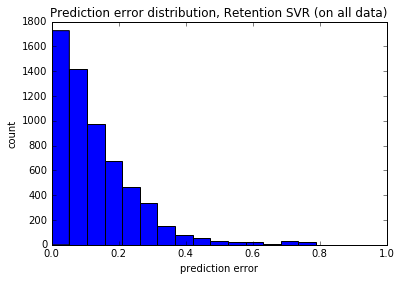

In [14]:
# print [y_test.shape, y_all.shape]
# print [X_test.shape, X_all.shape]

hist_plot_delta(SVR_model, X_test, y_test, 'SVR (on reduced data set)')
hist_plot_delta(SVR_model, finalX, y_all, 'SVR (on all data)')

#### Try predicting only college that is not "for profit"

Because the visualization chart for this reduced data does not show any green color--which indicates for profit college--we'll try using this model to predict only college that is not "for profit" 

In [15]:
selectedX = data[selected_features].copy()

# Fill missing values
for col in selected_cols:
    if col in X:
        selectedX[col] = selectedX[col].fillna(selectedX[col].mean())

print selectedX.shape
print len(selectedX.dropna()) # check there is no missing values

# remove "for profit college"
selectedX = selectedX[~(selectedX.CONTROL == 3)]
print selectedX.groupby('CONTROL').size()
# print selectedX.columns

y1_all = selectedX.C150
y2_all = selectedX.RET_FT
y_all = selectedX[['C150', 'RET_FT']].as_matrix()
selectedX = selectedX.drop('C150', 1)
selectedX = selectedX.drop('RET_FT', 1)

print selectedX.shape
print y_all.shape

(6007, 14)
6007
CONTROL
1    1882
2    1428
dtype: int64
(3310, 12)
(3310, 2)


In [16]:
# use scaler that was used to train the model
scaledX = scaler.transform(selectedX[selected_cols])

tmp1X = np.array(pd.get_dummies(selectedX['CONTROL']))
tmp2X = selectedX['L4_COLLEGE'].astype(int)
tmp2X = np.reshape(tmp2X, (len(tmp2X), 1)) 
tmp3X = np.zeros((len(tmp2X), 1)) 
print tmp1X.shape
print tmp2X.shape
print tmp3X.shape
print scaledX.shape
finalX = np.concatenate((scaledX, tmp1X, tmp2X, tmp3X), axis=1)
print finalX.shape

print "--- Completion ---"
print_r2score(SVR_model['reg1'], finalX, y1_all, test=True)
print_mse(SVR_model['reg1'], finalX, y1_all, test=True)
print_mae(SVR_model['reg1'], finalX, y1_all, test=True)

print "--- Retention ---"
print_r2score(SVR_model['reg2'], finalX, y2_all, test=True)
print_mse(SVR_model['reg2'], finalX, y2_all, test=True)
print_mae(SVR_model['reg2'], finalX, y2_all, test=True)

(3310, 2)
(3310, 1)
(3310, 1)
(3310, 10)
(3310, 14)
--- Completion ---
R2 score on test  data: 0.32820571069
MSE on test  data: 0.0394587447183
MAE on test  data: 0.156795034004
--- Retention ---
R2 score on test  data: 0.0820662844252
MSE on test  data: 0.0241350991664
MAE on test  data: 0.114856732978


0.11485673297807658

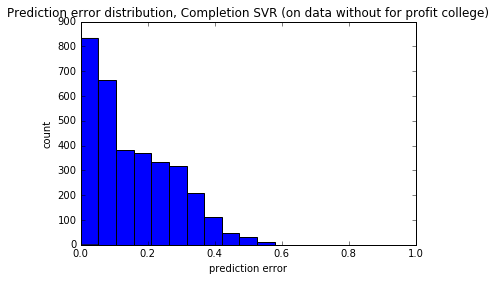

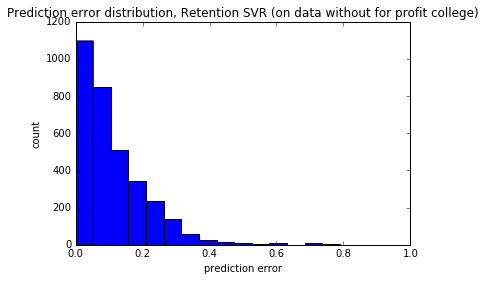

In [17]:
hist_plot_delta(SVR_model, finalX, y_all, 'SVR (on data without for profit college)')

### Conclusion

The model that is trained using smaller data set is still not good enough to predict the larger dataset, even when the larger dataset is limited to data that is not for profit college.